<a href="https://colab.research.google.com/github/gustavo-plc/PyStatistics/blob/main/AEDI_T5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NOTEBOOK DESTINADO A REGISTRAR AS TAREFAS DA DISCIPLINA DE AEDI - 1º/2025
### PROFESSOR: JOÃO GABRIEL DE MORAES SOUZA
### ALUNO: GUSTAVO PARREIRA LIMA CUNHA

# **TAREFA 5 - REGRESSÃO LOGÍSTICA**

## QUESTÃO A - Modelagem da Retenção de clientes

### CARREGAMENTO E ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
import pandas as pd

# Especificação do caminho do arquivo csv

path = '/content/drive/MyDrive/AEDI/Churn_Modelling.csv'

dados = pd.read_csv(path)

# teste de exibição do df

print(dados)

      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMemb

TRATAMENTO E EXPLORAÇÃO DOS DADOS
1. REMOÇÃO DE DADOS INCONSISTENTES
2. EXPLORAÇÃO DOS DADOS E SELEÇÃO DE ATRIBUTOS

In [ ]:
# DETERMINAÇÃO DAS COLUNAS DE INTERESSE PARA ANÁLISE PRÉVIA.

# CONTAGEM DE VALORES NULOS EM COLUNAS DE INTERESSE

print(dados['CustomerId'].isna().sum())
print(dados['CreditScore'].isna().sum())
print(dados['Age'].isna().sum())
print(dados['EstimatedSalary'].isna().sum())

# colunas não mostraram valores nulos, indicando boa consistência e completude dos dados.

0
0
0
0


ANÁLISE EXPLORATÓRIA DOS DADOS

In [ ]:
# PROPORÇÃO DE CHURN

# Contar ocorrências de saída (churn) (ex: 'Exited == 1')

churn = dados['Exited'].sum()
total = dados['CustomerId'].value_counts().sum()
prop = churn / total

print("\nQuantidade de saídas:", churn)
print("\nQuantidade de clientes da base:", total)

print(f"\nProporção de churn: {prop*100:.2f} %")


Quantidade de saídas: 2037

Quantidade de clientes da base: 10000

Proporção de churn: 20.37 %


EXPLORANDO INDÍCIOS DE TENDÊNCIAS PARA CHURN: desses 20,37% que abandonam o serviço, existe algum atributo predominante, presente na maioria dos casos?

      RowNumber  CustomerId      Surname  CreditScore Geography  Gender  Age  \
0             1    15634602     Hargrave          619    France  Female   42   
2             3    15619304         Onio          502    France  Female   42   
5             6    15574012          Chu          645     Spain    Male   44   
7             8    15656148       Obinna          376   Germany  Female   29   
16           17    15737452        Romeo          653   Germany    Male   58   
...         ...         ...          ...          ...       ...     ...  ...   
9981       9982    15672754     Burbidge          498   Germany    Male   42   
9982       9983    15768163      Griffin          655   Germany  Female   46   
9991       9992    15769959  Ajuluchukwu          597    France  Female   53   
9997       9998    15584532          Liu          709    France  Female   36   
9998       9999    15682355    Sabbatini          772   Germany    Male   42   

      Tenure    Balance  NumOfProducts 

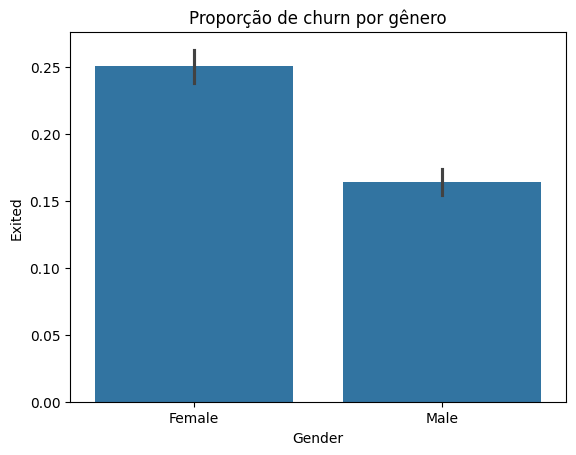



Exited             0          1
Geography                      
France     83.845233  16.154767
Germany    67.556796  32.443204
Spain      83.326605  16.673395



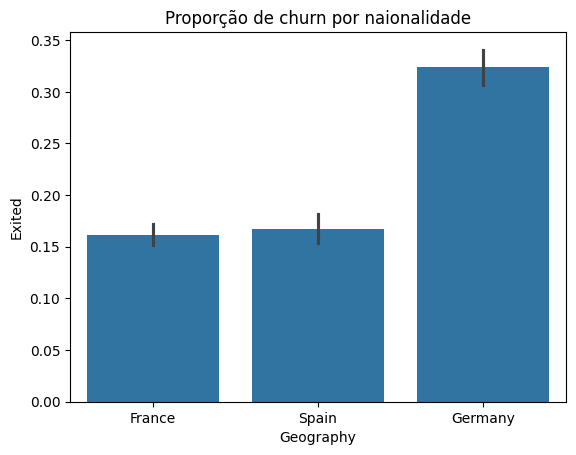

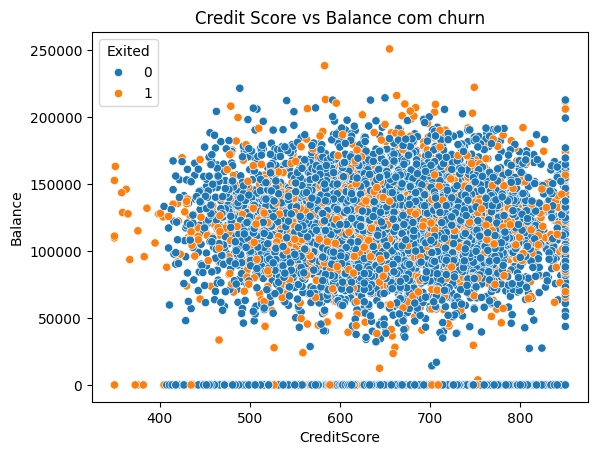

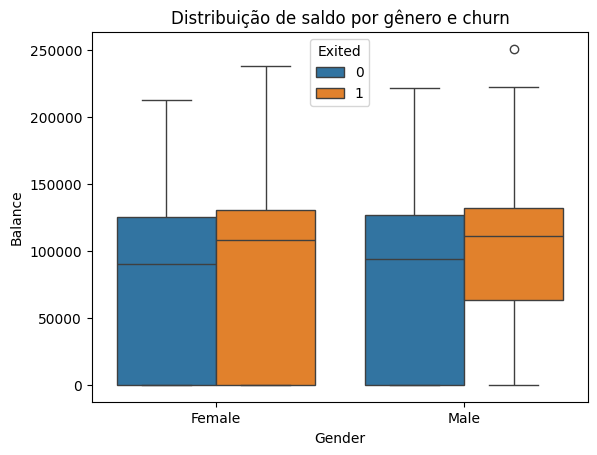


Geography  Gender
France     Female    0.203450
           Male      0.127134
Germany    Female    0.375524
           Male      0.278116
Spain      Female    0.212121
           Male      0.131124
Name: Exited, dtype: float64

Gender       Female      Male
Geography                    
France     0.203450  0.127134
Germany    0.375524  0.278116
Spain      0.212121  0.131124



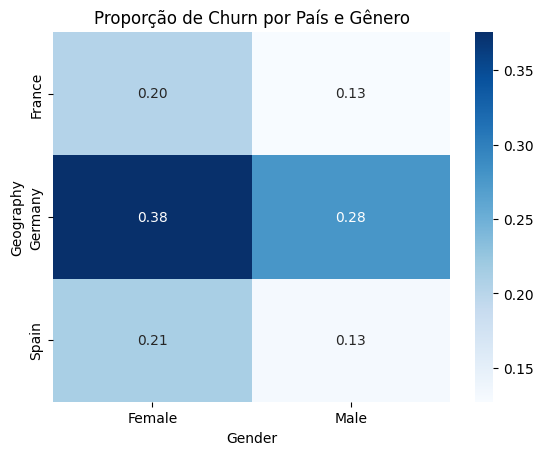

In [ ]:
df_churn = dados[dados['Exited'] == 1]
print(df_churn)

df_naoChurn = dados[dados['Exited'] == 0]

# análise estatística de creditScore

print('\nAnálise estatística de CreditScore dos NÃO churn clients')

print(df_naoChurn['CreditScore'].mean())
print(df_naoChurn['CreditScore'].max())
print(df_naoChurn['CreditScore'].min())
print(df_naoChurn['CreditScore'].std())

print('\nAnálise estatística de CreditScore dos churn clients')

print(df_churn['CreditScore'].mean())
print(df_churn['CreditScore'].max())
print(df_churn['CreditScore'].min())
print(df_churn['CreditScore'].std())

# o valor mínimo de creditscore para os churn clients é consideravelmente menor que os não churn clients.

# análise estatística de EstimatedSalary

print('\nAnálise estatística de EstimatedSalary dos NÃO churn clients')

print(df_naoChurn['EstimatedSalary'].mean())
print(df_naoChurn['EstimatedSalary'].max())
print(df_naoChurn['EstimatedSalary'].min())
print(df_naoChurn['EstimatedSalary'].std())

print('\nAnálise estatística de EstimatedSalary dos churn clients')

print(df_churn['EstimatedSalary'].mean())
print(df_churn['EstimatedSalary'].max())
print(df_churn['EstimatedSalary'].min())
print(df_churn['EstimatedSalary'].std())

# ANALISANDO FREQUÊNCIA E PROPORÇÃO PARA ALGUMAS VARIÁVEIS CATEGÓRICAS

import seaborn as sns
import matplotlib.pyplot as plt


print()
# Tabela cruzada: contagem de churn por gênero
print(pd.crosstab(dados['Gender'], dados['Exited']))
print()
# Proporção de churn por gênero
print(pd.crosstab(dados['Gender'], dados['Exited'], normalize='index') * 100)
print()
#  churn por gênero
sns.barplot(x='Gender', y='Exited', data=dados)
plt.title('Proporção de churn por gênero')
plt.show()
print()
# mulheres dão mais churn estatisticamente quando comparadas aos homens.
print()
print(pd.crosstab(dados['Geography'], dados['Exited'], normalize='index') * 100)
print()

# Exemplo: proporção de churn por gênero
sns.barplot(x='Geography', y='Exited', data=dados)
plt.title('Proporção de churn por naionalidade')
plt.show()
print()

# os alemães estatisticamente são mais propensos a dar churn do que outras nacionalidades



# análises multivariadas, com duas variáveis

# relação entre CreditScore e Balance
sns.scatterplot(x='CreditScore', y='Balance', hue='Exited', data=dados)
plt.title('Credit Score vs Balance com churn')
plt.show()
print()

# a análise multivariada de creditScore e Balance não mostrou concentração de churns em nenhuma região do gráfico, ou seja, não evidenciou nenhum padrão para a variável de interesse churn.

# distribuição de saldo por gênero e churn
sns.boxplot(x='Gender', y='Balance', hue='Exited', data=dados)
plt.title('Distribuição de saldo por gênero e churn')
plt.show()
print()

# não foi possível extrair relações significativas por meio da exploração de gender e balance.

# finalmente, será analisada a possível relação entre gender e geography, duas variáveis categóricas.

# Proporção média de churn (Exited) por país e gênero
tabela = dados.groupby(['Geography', 'Gender'])['Exited'].mean()
print(tabela)
print()

# Tabela cruzada com proporção de churn
tabela_cruzada = pd.crosstab(index=dados['Geography'],
                              columns=dados['Gender'],
                              values=dados['Exited'],
                              aggfunc='mean')  # média representa a proporção de churn

print(tabela_cruzada)
print()

import seaborn as sns
import matplotlib.pyplot as plt

# Tabela para gráfico
tabela_heatmap = pd.crosstab(dados['Geography'], dados['Gender'], values=dados['Exited'], aggfunc='mean')

# Plotar o heatmap
sns.heatmap(tabela_heatmap, annot=True, cmap='Blues', fmt='.2f')
plt.title('Proporção de Churn por País e Gênero')
plt.show()



A PARTIR DA ANÁLISE EXPLORATÓRIA FOI POSSÍVEL PERCEBER QUE MULHERES TENDEM A DAR CHURN MAIS QUE HOMENS, QUE ALEMÃES TENDEM A DAR CHURN MAIS QUE AS OUTRAS NACIONALIDADES ANALISADAS, QUE O MÍNIMO VALOR DE SALÁRIO ESTIMADO DOS CLIENTES QUE DÃO CHURN É MUITO MENOR QUE O DOS CLIENTES QUE NÃO DÃO CHURN, E QUE O CREDITSCORE MÍNIMO DOS CLIENTES QUE DÃO CHURN TAMBÉM É MENOR.

### MODELAGEM

PRESSUPOSTOS:

1. Na Regressão Logística Binária a variável dependente é binária.

No caso da análise de churn, a variável dependente é dados['Exited'], que assume valores 0 ou 1, ou seja, binária.

2. Para Regressão Logística Binária, o fator da variável dependente deve representar o desejo do analista.

O "desejo do analista" significa que o valor 1 deve representar o desfecho de interesse, ou seja, aquilo que o analista quer prever ou entender melhor.

No caso de churn: A variável 'Exited' já está assim:

Exited = 1 → cliente saiu (deu churn)

Exited = 0 → cliente permaneceu

Então, ao fazer a regressão logística, o modelo vai estimar a probabilidade de Exited = 1, ou seja, a probabilidade do cliente dar churn.

3. Apenas as variáveis importantes deve ser alocadas no modelo.

Será testado a seguir.

4. Não deverá possuir multicolinearidade.

Será testado a seguir.

5. As varáveis independentes são lineares em relação ao log das probabilidades no Logit.

Será analisado a seguir.

6. Regressão Logística requer um número grande de observações.

Considerando que se tem 10000 observações válidas, considera-se atendido esse pressuposto.

In [ ]:
# teste do pressuposto 3: definição das variáveis importantes.

# NA FASE DE PRÉ-MODELAGEM, PARA DEFINIÇÃO DAS VARIÁVEIS RELEVANTES PARA O MODELO, SERÃO UTILIZADOS TESTES ESTATÍSTICOS PARA AVALIAR A RELAÇÃO INDIVIDUAL DE CADA VARIÁVEL PARA O FENÔMENO DO CHURN.

# PARA AS VARIÁVEIS CATEGÓRICAS SERÁ USADO O TESTE QUI-QUADRADO E PARA AS QUANTITATIVAS, O TESTE T.

print(dados.columns)

# ANÁLISE DAS CATEGÓRICAS POTENCIALMENTE IMPORTANTES: geography, gender, hasCrCard and IsActiveMember

from scipy.stats import chi2_contingency

tabela1 = pd.crosstab(dados['Geography'], dados['Exited'])
qui2, p, _, _ = chi2_contingency(tabela1)
print(f'P-valor para Geography: {p}')
print()

tabela2 = pd.crosstab(dados['Gender'], dados['Exited'])
qui2, p, _, _ = chi2_contingency(tabela2)
print(f'P-valor para Gender: {p}')
print()

tabela3 = pd.crosstab(dados['HasCrCard'], dados['Exited'])
qui2, p, _, _ = chi2_contingency(tabela3)
print(f'P-valor para HasCrCard: {p}')
print()

tabela4 = pd.crosstab(dados['IsActiveMember'], dados['Exited'])
qui2, p, _, _ = chi2_contingency(tabela4)
print(f'P-valor para IsActiveMember: {p}')
print()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')
P-valor para Geography: 3.8303176053541544e-66

P-valor para Gender: 2.2482100097131755e-26

P-valor para HasCrCard: 0.49237236141554686

P-valor para IsActiveMember: 8.785858269303703e-55



Valores baixos de p-valor indicam rejeição da hipótese nula, que nesse caso é: A variável categórica (Geography) é independente da variável de saída (Exited).

Então, das variáveis categóricas analisadas, somente HasCrCard apresentou alto p-valor, o que indica que Geography, Gender e IsActiveMember são variáveis importantes para constarem no modelo.

In [ ]:
# teste do pressuposto 3: definição das variáveis importantes.

# NA FASE DE PRÉ-MODELAGEM, PARA DEFINIÇÃO DAS VARIÁVEIS RELEVANTES PARA O MODELO, SERÃO UTILIZADOS TESTES ESTATÍSTICOS PARA AVALIAR A RELAÇÃO INDIVIDUAL DE CADA VARIÁVEL PARA O FENÔMENO DO CHURN.

# PARA AS VARIÁVEIS CATEGÓRICAS SERÁ USADO O TESTE QUI-QUADRADO E PARA AS QUANTITATIVAS, O TESTE T.

print(dados.columns)
print()
# ANÁLISE DAS QUANTITATIVAS POTENCIALMENTE IMPORTANTES: CreditScore, Tenure, Balance and NumOfProducts AND EstimatedSalary

from scipy.stats import ttest_ind

grupo1 = dados[dados['Exited'] == 1]['CreditScore']
grupo0 = dados[dados['Exited'] == 0]['CreditScore']
stat, p = ttest_ind(grupo1, grupo0)
print(f'P-valor para CreditScore: {p}')
print()

grupo1 = dados[dados['Exited'] == 1]['Tenure']
grupo0 = dados[dados['Exited'] == 0]['Tenure']
stat, p = ttest_ind(grupo1, grupo0)
print(f'P-valor para Tenure: {p}')
print()

grupo1 = dados[dados['Exited'] == 1]['Balance']
grupo0 = dados[dados['Exited'] == 0]['Balance']
stat, p = ttest_ind(grupo1, grupo0)
print(f'P-valor para Balance: {p}')
print()

grupo1 = dados[dados['Exited'] == 1]['NumOfProducts']
grupo0 = dados[dados['Exited'] == 0]['NumOfProducts']
stat, p = ttest_ind(grupo1, grupo0)
print(f'P-valor para NumOfProducts: {p}')
print()

grupo1 = dados[dados['Exited'] == 1]['EstimatedSalary']
grupo0 = dados[dados['Exited'] == 0]['EstimatedSalary']
stat, p = ttest_ind(grupo1, grupo0)
print(f'P-valor para EstimatedSalary: {p}')
print()

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

P-valor para CreditScore: 0.006738213892192373

P-valor para Tenure: 0.16152684949473256

P-valor para Balance: 1.2755633191525477e-32

P-valor para NumOfProducts: 1.717333004804293e-06

P-valor para EstimatedSalary: 0.22644042802223352



O teste-t aplicado às variáveis quantitativas mostrou que são relevantes as variáveis CreditScore, Balance e NumOfProducts, por terem apresentado baixo p-valor, rejeitando-se a hipótese nula de que elas não tem relação dignificativa com a variável dependente.

Portanto, serão incorporadas ao modelo as variáveis:

1. CreditScore
2. Balance
3. NumOfProducts
4. Geography
5. Gender
6. IsActiveMember

Agora deve-se analisar se há presença de multicolinearidade entre as variáveis escolhidas, como mais um requisito para aplicação do modelo.

In [ ]:
# cálculo do VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Seleção das variáveis relevantes
X = dados[['CreditScore', 'Balance', 'NumOfProducts', 'Geography', 'Gender', 'IsActiveMember']]

# Transformar variáveis categóricas com One-Hot Encoding
colunas_categoricas = ['Geography', 'Gender']
colunas_numericas = ['CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember']

preprocessador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), colunas_categoricas),
    ('num', StandardScaler(), colunas_numericas)
])

X_processado = preprocessador.fit_transform(X)

# Converter para DataFrame
nomes_colunas = (
    preprocessador.named_transformers_['cat'].get_feature_names_out(colunas_categoricas).tolist()
    + colunas_numericas
)
X_df = pd.DataFrame(X_processado, columns=nomes_colunas)

# Calcular VIF
vif = pd.DataFrame()
vif["Variável"] = X_df.columns
vif["VIF"] = [variance_inflation_factor(X_df.values, i) for i in range(X_df.shape[1])]

print(vif)


            Variável       VIF
0  Geography_Germany  1.362994
1    Geography_Spain  1.202757
2        Gender_Male  1.382859
3        CreditScore  1.000973
4            Balance  1.302381
5      NumOfProducts  1.119283
6     IsActiveMember  1.001637


Não foi encontrada multicolinearidade entre as variáveis, então todas podem ser usadas para elaboração do modelo.

In [ ]:
# aplicação do modelo de regressão logística usando as variáveis 'CreditScore', 'Geography', 'Gender', 'Balance'


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Seleção das variáveis e alvo
X = dados[['CreditScore', 'Geography', 'Gender', 'Balance']]
y = dados['Exited']

# 2. Pré-processamento: Encoding + Padronização
colunas_categoricas = ['Geography', 'Gender']
colunas_numericas = ['CreditScore', 'Balance']

preprocessador = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(drop='first'), colunas_categoricas),
    ('num', StandardScaler(), colunas_numericas)
])

# 3. Pipeline com Regressão Logística
pipeline = Pipeline(steps=[
    ('preprocessamento', preprocessador),
    ('modelo', LogisticRegression(solver='liblinear'))
])

# 4. Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 5. Treinamento
pipeline.fit(X_train, y_train)

# 6. Predição
y_pred = pipeline.predict(X_test)

# 7. Avaliação
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))


Acurácia: 0.8053333333333333

Matriz de confusão:
 [[2416    0]
 [ 584    0]]

Relatório de classificação:
               precision    recall  f1-score   support

           0       0.81      1.00      0.89      2416
           1       0.00      0.00      0.00       584

    accuracy                           0.81      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.81      0.72      3000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Análise dos coeficientes:

In [ ]:
# Obter os nomes das variáveis após o OneHotEncoding + StandardScaler
nomes_categorias = pipeline.named_steps['preprocessamento'].named_transformers_['cat'].get_feature_names_out(['Geography', 'Gender'])
nomes_numericos = ['CreditScore', 'Balance']
nomes_variaveis = list(nomes_categorias) + nomes_numericos

# Obter os coeficientes
coeficientes = pipeline.named_steps['modelo'].coef_[0]

# Juntar tudo em um DataFrame
import pandas as pd
df_coef = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Coeficiente': coeficientes
})

print(df_coef)


            Variável  Coeficiente
0  Geography_Germany     0.743792
1    Geography_Spain     0.070758
2        Gender_Male    -0.555137
3        CreditScore    -0.082774
4            Balance     0.186334


Interpretação dos coeficientes

1. Geography_Germany (+0.7438)
Estar na Alemanha aumenta significativamente a chance de churn, em comparação com a Inglaterra (categoria de referência).


2. Geography_Spain (+0.0708)
Estar na Espanha aumenta levemente a chance de churn em relação à Inglaterra.


3. Gender_Male (–0.5551)
Ser homem reduz a chance de churn em relação a ser mulher.


4. CreditScore (–0.0828)
Quanto maior o CreditScore, menor a chance de churn.

Como essa variável foi padronizada, o coeficiente indica que para cada 1 desvio padrão a mais em CreditScore, a chance de churn diminui.


5. Balance (+0.1863)
Quanto maior o saldo bancário do cliente, maior a chance de churn.

Pode indicar que clientes com mais saldo se sentem mais confortáveis para mudar de banco ou investir em outros lugares.

Conclusão:

- Clientes alemães e com saldo alto estão mais propensos a sair.

- Homens, clientes com maior CreditScore e espanhóis tendem a permanecer mais.

## QUESTÃO B - Validação dos Pressupostos do Modelo

Considerando que a análise de multicolinearidade já foi realizada, serão tratados adiante a linearidade entre as variáveis dependentes e o Logit e o balanceamento da variável dependente.

Exited                 int64
CreditScore            int64
Balance              float64
Gender_Male             bool
Geography_Germany       bool
Geography_Spain         bool
dtype: object
Optimization terminated successfully.
         Current function value: 0.483881
         Iterations 6


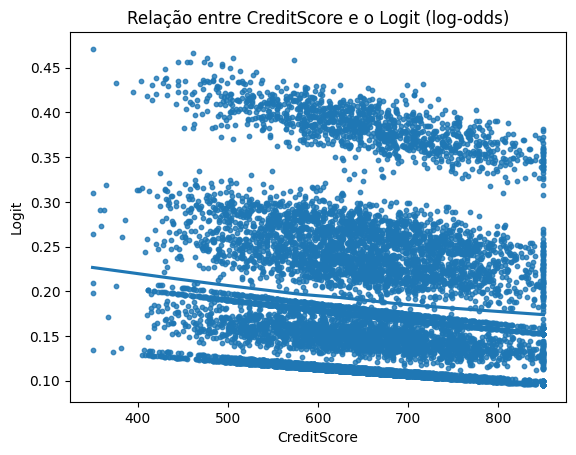

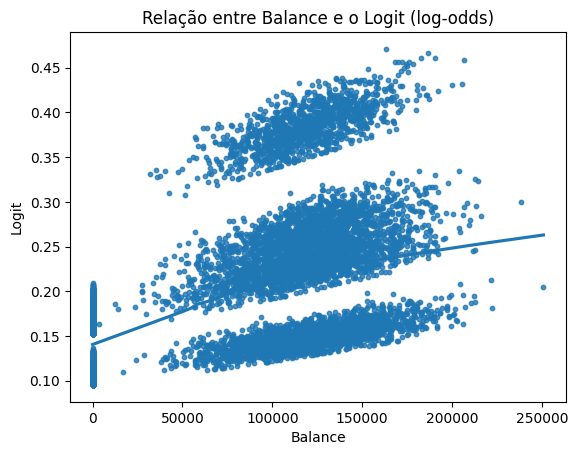

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pandas as pd

# Subconjunto com as variáveis relevantes
dados_modelo = dados[['Exited', 'CreditScore', 'Balance', 'Gender', 'Geography']]

# One-hot encoding para variáveis categóricas
dados_dummies = pd.get_dummies(dados_modelo, drop_first=True)

# Verifique se todas as colunas são numéricas
print(dados_dummies.dtypes)

# Separar X e y
X = dados_dummies.drop('Exited', axis=1)
y = dados_dummies['Exited']

# Adicionar constante ao modelo
X_const = sm.add_constant(X)

# Converter tudo para float (garante que não há objetos)
X_const = X_const.astype(float)
y = y.astype(float)

# Ajustar modelo logístico
modelo = sm.Logit(y, X_const).fit()

# Calcular os log-odds (logit)
logit = modelo.predict(X_const)

# Ver relação com as variáveis contínuas
for col in ['CreditScore', 'Balance']:
    sns.regplot(x=dados[col], y=logit, lowess=True, scatter_kws={'s': 10})
    plt.title(f'Relação entre {col} e o Logit (log-odds)')
    plt.xlabel(col)
    plt.ylabel('Logit')
    plt.show()


PARA A ANÁLISE DAS VARIÁVEIS NUMÉRICAS, A FORMA DA CURVA DA VARIÁVEL BALANCE SUGERE NÃO LINEARIDADE, AINDA QUE SUTIL.

Isso indica que o efeito de Balance sobre a probabilidade de churn pode não ser constante em toda a faixa de valores.

PORTANTO, PARA ESSA VARIÁVEL

/tmp/ipython-input-65-1177908718.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_modelo['log_Balance'] = np.log(dados_modelo['Balance'] + 1)


Optimization terminated successfully.
         Current function value: 0.483917
         Iterations 6


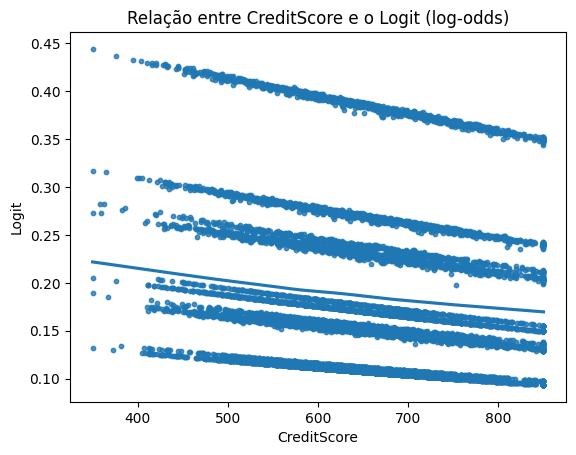

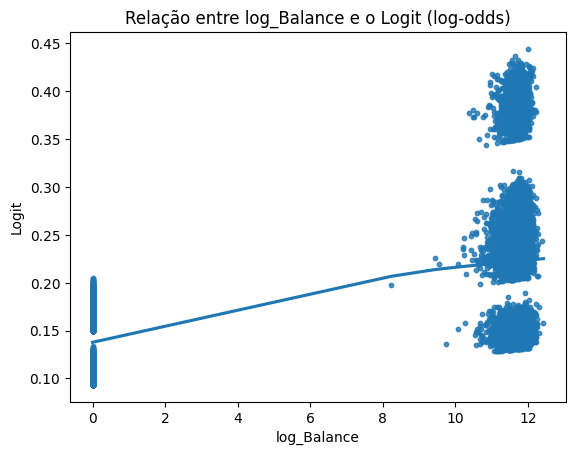

In [ ]:
# Aplicar transformação logarítmica diretamente na variável Balance
dados_modelo['log_Balance'] = np.log(dados_modelo['Balance'] + 1)

# Substituir Balance por log_Balance
dados_modelo = dados_modelo.drop(columns='Balance')

# One-hot encoding novamente (após modificação do DataFrame)
dados_dummies = pd.get_dummies(dados_modelo, drop_first=True)

# Separar X e y
X = dados_dummies.drop('Exited', axis=1)
y = dados_dummies['Exited']

# Adicionar constante
X_const = sm.add_constant(X)

# Garantir tipo float
X_const = X_const.astype(float)
y = y.astype(float)

# Ajustar novo modelo logístico
modelo = sm.Logit(y, X_const).fit()


# Calcular logit
logit = modelo.predict(X_const)

# Replotar relação com CreditScore e log_Balance
for col in ['CreditScore', 'log_Balance']:
    sns.regplot(x=dados_modelo[col], y=logit, lowess=True, scatter_kws={'s': 10})
    plt.title(f'Relação entre {col} e o Logit (log-odds)')
    plt.xlabel(col)
    plt.ylabel('Logit')
    plt.show()


Não foi possível observar linearidade entre a variável independente Balance e o Logit, porém ao aplicar transformação logarítimica na variável Balance + 1 (soma-se 1 para sair da origem, pois a função log não é definida para 0), foi possível obter a linearidade.

Como a Regressão Logística é sensível a desbalanceamentos, é necessário avaliar o balanceamento da variável dependente ['Exited']. Se a variável dependente for desbalanceada, o modelo poderá aprender a partir de dados enviesados, e prejudicará sua capacidade de previsão.

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64


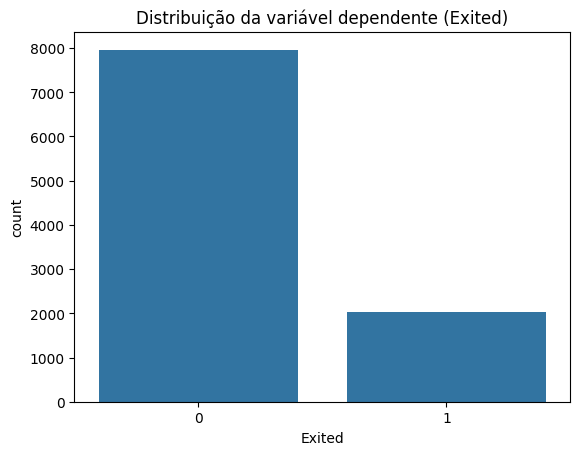

In [ ]:
# Ver proporção das classes
classe_counts = dados_modelo['Exited'].value_counts(normalize=True)
print(classe_counts)

# Plotar a distribuição
sns.countplot(x='Exited', data=dados_modelo)
plt.title('Distribuição da variável dependente (Exited)')
plt.show()


Como foi constatado que a classe target possui proporção de aproximadamente 80/20 % para cada um dos dois valores assumidos, conclui-se que ela está desbalanceada e precisa de tratamento.

A variável dependente Exited apresentou desbalanceamento significativo (aproximadamente proporção de 80/20%) entre as classes. Isso pode comprometer a capacidade preditiva do modelo, especialmente para a classe minoritária (clientes que deixam o banco). Por esse motivo, será utilizada a técnica SMOTE (Synthetic Minority Over-sampling Technique) para gerar novas observações sintéticas da classe minoritária no conjunto de treino, garantindo um aprendizado mais justo.

O Smote será aplicado somente no conjunto de treino.

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separar em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_const, y, stratify=y, random_state=42, test_size=0.3)

# Aplicar SMOTE no conjunto de treino
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Verificar balanceamento após SMOTE
print(pd.Series(y_train_res).value_counts())

# Criar DataFrame com os dados balanceados
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns)
y_train_res_df = pd.Series(y_train_res, name='Exited')



Exited
0.0    5574
1.0    5574
Name: count, dtype: int64


Após a aplicação da técnica de balanceamento de classes (SMOTE), a variável dependente ['Exited'] teve sua proporção ajustada para 50% para cada um dos valores que pode assumir (0 ou 1), contrariamente à situação anterior de 20% e 80% respectivamente.

Será a seguir aplicada a Regressão Logística aos dados balanceados, para comparação com o modelo anterior.

In [ ]:
import statsmodels.api as sm
import pandas as pd

# Converter X e y para DataFrame e Series, com tipos numéricos
X_train_res_df = pd.DataFrame(X_train_res, columns=X.columns).astype(float)
y_train_res_df = pd.Series(y_train_res, name='Exited').astype(float)

# Adicionar constante
X_train_const = sm.add_constant(X_train_res_df)

# Ajustar modelo
modelo_balanceado = sm.Logit(y_train_res_df, X_train_const).fit()

# Exibir os resultados
print(modelo_balanceado.summary())


Optimization terminated successfully.
         Current function value: 0.653136
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                11148
Model:                          Logit   Df Residuals:                    11142
Method:                           MLE   Df Model:                            5
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                 0.05772
Time:                        14:09:29   Log-Likelihood:                -7281.2
converged:                       True   LL-Null:                       -7727.2
Covariance Type:            nonrobust   LLR p-value:                1.374e-190
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.6294      0.138      4.557      0.000       0.359       0.900
CreditSc

agora o modelo treinado com a base balanceada será aplicado no conjunto de teste original, para comparação fidedigna entre os modelos.

In [ ]:
# 1. Preparar X_test com as mesmas colunas e formato usado no treino
X_test_df = pd.DataFrame(X_test, columns=X.columns).astype(float)
X_test_const = sm.add_constant(X_test_df)

# 2. Predizer probabilidades com o modelo treinado em dados balanceados
y_pred_probs = modelo_balanceado.predict(X_test_const)

# 3. Converter para classes (limiar 0.5)
y_pred_classes = (y_pred_probs > 0.5).astype(int)

# 4. Avaliação do desempenho no conjunto de teste original
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Avaliação do modelo balanceado (SMOTE) no conjunto de teste original:")
print("Acurácia:", accuracy_score(y_test, y_pred_classes))
print("\nMatriz de confusão:\n", confusion_matrix(y_test, y_pred_classes))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred_classes))


Avaliação do modelo balanceado (SMOTE) no conjunto de teste original:
Acurácia: 0.624

Matriz de confusão:
 [[1528  861]
 [ 267  344]]

Relatório de classificação:
               precision    recall  f1-score   support

         0.0       0.85      0.64      0.73      2389
         1.0       0.29      0.56      0.38       611

    accuracy                           0.62      3000
   macro avg       0.57      0.60      0.55      3000
weighted avg       0.74      0.62      0.66      3000



## QUESTÃO C - Importância das variáveis

A partir dos coeficientes já calculados, serão calculadas agora as razões de chance e também as medidas de importância.

In [ ]:
import numpy as np
import pandas as pd

# Obter os nomes das variáveis transformadas
nomes_categorias = pipeline.named_steps['preprocessamento'].named_transformers_['cat'].get_feature_names_out(['Geography', 'Gender'])
nomes_numericos = ['CreditScore', 'Balance']
nomes_variaveis = list(nomes_categorias) + nomes_numericos

# Obter os coeficientes do modelo
coeficientes = pipeline.named_steps['modelo'].coef_[0]

# Calcular razões de chance (odds ratio)
odds_ratios = np.exp(coeficientes)

# Calcular importância (valor absoluto dos coeficientes)
importancia = np.abs(coeficientes)

# Criar DataFrame com os resultados
df_resultado = pd.DataFrame({
    'Variável': nomes_variaveis,
    'Coeficiente': coeficientes,
    'Razão de Chance (Odds Ratio)': odds_ratios,
    'Importância (|Coef|)': importancia
})

# Ordenar por importância
df_resultado = df_resultado.sort_values(by='Importância (|Coef|)', ascending=False).reset_index(drop=True)

# Exibir a tabela
print(df_resultado)


            Variável  Coeficiente  Razão de Chance (Odds Ratio)  \
0  Geography_Germany     0.743792                      2.103898   
1        Gender_Male    -0.555137                      0.573993   
2            Balance     0.186334                      1.204824   
3        CreditScore    -0.082774                      0.920559   
4    Geography_Spain     0.070758                      1.073321   

   Importância (|Coef|)  
0              0.743792  
1              0.555137  
2              0.186334  
3              0.082774  
4              0.070758  


 1. Geography_Germany
Coeficiente: +0.744

Razão de Chance (Odds Ratio): 2.10

Interpretação:
Clientes da Alemanha têm 2,1 vezes mais chance de sair do banco em relação aos clientes da França (categoria base).


2. Gender_Male
Coeficiente: –0.555

Razão de Chance (Odds Ratio): 0.57

Interpretação:
Clientes do sexo masculino têm 43% menos chance de churn em relação às mulheres.


3. Balance
Coeficiente: +0.186

Razão de Chance (Odds Ratio): 1.20

Interpretação:
Um aumento de 1 desvio padrão no saldo do cliente aumenta em 20% a chance de churn.

4. CreditScore
Coeficiente: –0.083

Razão de Chance (Odds Ratio): 0.92

Interpretação:
Um aumento no Credit Score está associado a uma leve redução de 8% na chance de churn.

5. Geography_Spain
Coeficiente: +0.071

Razão de Chance (Odds Ratio): 1.07

Interpretação:
Clientes da Espanha têm 7% mais chance de churn do que os da França.


- Conclusão Geral
Com base nos resultados do modelo, recomenda-se focar a retenção em três frentes principais: clientes da Alemanha, que apresentam maior propensão ao churn e podem demandar ações regionais específicas; mulheres, que demonstraram maior tendência à saída em comparação aos homens; e clientes com altos saldos, que mesmo sendo financeiramente atrativos, indicam maior risco de desligamento. Além disso, é válido acompanhar clientes com score de crédito mais baixo e os residentes na Espanha, ainda que com impacto menor. Essas ações permitem um planejamento de retenção mais direcionado e eficiente, baseado em perfis de maior risco identificados pelo modelo.


## QUESTÃO D - Avaliação do modelo

0.6388750540358531



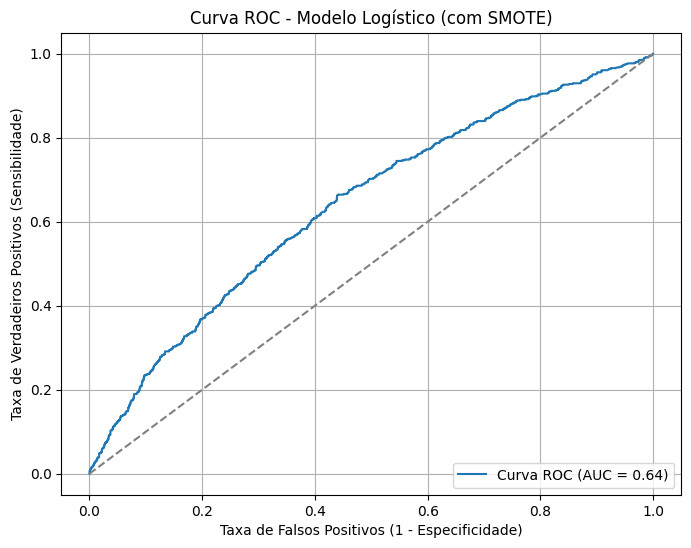

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

#  probabilidades para a classe 1 (churn)

y_pred_probs = modelo_balanceado.predict(sm.add_constant(X_test.astype(float)))

# Calcular auc_score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
auc_score = roc_auc_score(y_test, y_pred_probs)
print(auc_score)
print()


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # linha de referência
plt.xlabel('Taxa de Falsos Positivos (1 - Especificidade)')
plt.ylabel('Taxa de Verdadeiros Positivos (Sensibilidade)')
plt.title('Curva ROC - Modelo Logístico (com SMOTE)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


1. Acurácia: 62,4%

Mede a porcentagem total de acertos do modelo.

Limitação: pode ser enganosa em bases desbalanceadas, como essa antes da aplicação do smote, pois o modelo pode acertar muito os clientes que ficam e errar todos os que saem.

A acurácia caiu após o SMOTE, mas isso é esperado, já que o modelo começou a acertar mais churns.

O modelo acertou 62% das previsões totais.


2. Precisão (classe 1 - churn): 29%

Mede quantos dos clientes que o modelo previu como churn realmente saíram.

Alta precisão significa que o modelo erra pouco ao prever que alguém vai sair.

A precisão de 29% foi baixa, indicando que o modelo prevê alguns churns incorretamente, ou seja, de todos os clientes que o modelo previu que sairiam, 29% realmente saíram.

3. Sensibilidade (Recall - classe 1): 56%

Mede quantos dos clientes que realmente saíram foram corretamente identificados pelo modelo.

Essa é uma das métricas mais importantes no churn, pois indica a capacidade do modelo de "enxergar" os clientes que estão saindo.

O recall aumentou significativamente com SMOTE (56%), o que mostra que o modelo está aprendendo a detectar churns com mais eficácia.

O modelo conseguiu identificar 56% dos clientes que realmente saíram.

4. Especificidade (classe 0): 64%

Mede quantos dos clientes que ficam foram corretamente identificados.

Ajuda a garantir que o modelo não classifique todo mundo como churn.

O modelo acertou 64% dos clientes que permaneceram.

5. AUC - Área sob a curva ROC

Mede a capacidade geral do modelo de diferenciar clientes que saem dos que ficam.

O valor obtido de 0.64 mostra o equilíbrio global entre sensibilidade e especificidade.

In [ ]:
pip install pandoc


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 8.9 MB/s eta 0:00:00
  Created wheel for pandoc: filename=pandoc-2.4-py3-none-any.whl size=34793 sha256=2f1b217ca8a736d78bfc17bb97cdc2be2ecd56b36f8c268161efe5e06c4bf561
  Stored in directory: /root/.cache/pip/wheels/4f/d7/32/c6c9b7b05e852e920fd72174487be3a0f18e633a7adcc303be
Successfully built pandoc


In [ ]:
jupyter nbconvert --to pdf "AEDI_T5 (1).ipynb"


SyntaxError: invalid syntax (ipython-input-75-4123236491.py, line 1)